In [1]:
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('../MachineLearningCourse/train.csv', index_col=['Id'])
test_data = pd.read_csv('../MachineLearningCourse/test.csv', index_col=['Id'])


In [3]:
test_data.shape

(1459, 79)

In [4]:
train_data.shape

from sklearn.model_selection import train_test_split

train_no_sale_price = train_data.drop(labels=['SalePrice'], axis=1);
train_sale_price = train_data['SalePrice']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, train_sale_price, test_size = 0.3, random_state=4330)

In [6]:
# check if split was successfull
print(x_train.shape[0] == y_train.shape[0])

True


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
###### --------- THERE ARE INCOMPLETE DATA FROM DATASET (NA -> NAN -> AND SO ON)
x_train.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
128,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
878,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
880,False,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
163,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1181,False,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
853,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
77,False,False,True,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
603,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
728,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [9]:
##### FEATURE TUNING AND REPRESENTATION:
# Long story short -> where we see that we can encode category data will do it, with label encoder when we have some kind
# of data power unit (this can be done by brutforce change of data with numeric reprewsentation); when data does not
# handle some kind of power meaning will be used one-hot-encoder
# 
# When there aren't any data representing feature then they will be tune with std, average or will create new feature with
# appropriate data when possible

In [10]:
# !!!!!!!!!!!!!!!!!! Think of which feature you can get rid off


In [11]:
# feature MSSubClass is numeric but better to be categorical data, so as that been said will transofrm it to string
x_train['MSSubClass'] = x_train['MSSubClass'].astype(str)

# MSZoning is little more tricky, here will assume something like kNN algorithm and will get most frequently type
# think of how with kNN we can get correct type???
x_train['MSZoning'] = x_train['MSZoning'].fillna(x_train['MSZoning'].mode()[0])

x_train['LotFrontage'] = x_train['LotFrontage'].fillna(x_train['LotFrontage'].mean())

# Assume that if no data in Alley, there is no alley there - add new value inaccessible 
x_train['Alley'] = x_train['Alley'].fillna('Unaccessible');

# TRY WITH CONDITIONS AS STINGSSS
# x_train.OverallCondition = x_train.OverallCondition.astype(str)



In [12]:
#new_list = [expression(i) for i in old_list if filter(i)]
[element for element in x_train.MasVnrType.isnull() if element]
# x_train.MasVnrType.isnull()

[True, True, True, True]

In [13]:
x_train['MasVnrType'].mode()[0]

'None'

In [14]:
def fill_bsmnt_data(data):
    for element in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[element] = data[element].fillna('NoBasement')
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)

In [15]:
def fill_garage_data(data_frame):
    for element in ('GarageType', 'GarageFinish', 'GarageQual'):
        data_frame[element] = data_frame.fillna('NoGarage')
    data_frame['GarageCars'] = data_frame['GarageCars'].fillna(0)

In [16]:
x_train['TotalBsmtSF']

Id
128      672
878     1462
880      864
163     1541
1181    1216
853      918
77       952
603      908
728     1232
426      651
778      864
199      755
821      798
544      723
93       876
1249     735
339     1208
1060     854
1329    1510
730      780
955      945
453      872
1334     803
1160     901
295     1416
400     1092
1456     953
951      864
1233       0
403      672
        ... 
1152    1466
1331    1588
42      1350
1248    1012
539     1051
1288    1624
282     1262
1035     920
818     1568
1006     985
770     1650
437      648
805      936
910      742
668     1408
1297    1120
760     1318
964     1800
172     1080
779        0
736      880
1368     757
1161     855
859     1090
1239    1141
1114    1008
796      650
832      600
79      1768
57       970
Name: TotalBsmtSF, Length: 1022, dtype: int64

In [17]:
# Little of data in MasVnrType is without data so fill it with most frequantly value will handle it
x_train['MasVnrType'] = x_train['MasVnrType'].fillna(x_train['MasVnrType'].mode()[0])


# no data for basement will be treaten like there is no basement at all , so new value will be introduse to our model NoBasement
fill_bsmnt_data(x_train)

# same as previously data we fill with frequently one
x_train['Electrical'] = x_train['Electrical'].fillna(x_train['Electrical'].mode()[0])

x_train['KitchenAbvGr'] = x_train['KitchenAbvGr'].astype(str)

x_train['KitchenQual'] = x_train['KitchenQual'].fillna(x_train['KitchenQual'].mode()[0])

x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('NonFireplacement')

fill_garage_data(x_train)

x_train['SaleType'] = x_train['SaleType'].fillna(x_train['SaleType'].mode()[0])

x_train['YrSold'] = x_train['YrSold'].astype(str)

x_train['MoSold'] = x_train['MoSold'].astype(str)

# add new feature that will show overall area of appartment, if there is no data for component which is in calculation fill with 0
# x_train['TotalBsmtSF'] = x_train['TotalBsmtSF'].fillna(0.0)
# x_train['1stFlrSF'] = x_train['1stFlrSF'].fillna(0)
# x_train['2ndFlrSF'] = x_train['2ndFlrSF'].fillna(0)

# create new feature
x_train['TotalSF'] = x_train['TotalBsmtSF'] + x_train['1stFlrSF'] + x_train['2ndFlrSF']

x_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)



In [18]:
# drop some more features and if no good from this return and alter them
x_train.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

# x_train.drop('Utilities', axis=1, inplace=True)

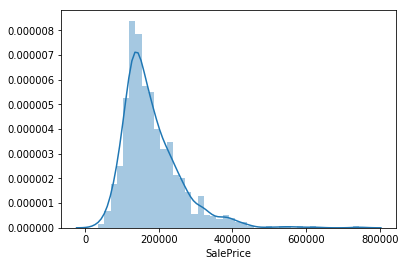

In [19]:
# check data from vector that need to be our result one
sns.distplot(y_train)

In [20]:
# it have right tail squeezed (something like chi square distribution with k = 3)
# To make data more normal will make transformation by logarithm
y_train = np.log(y_train)

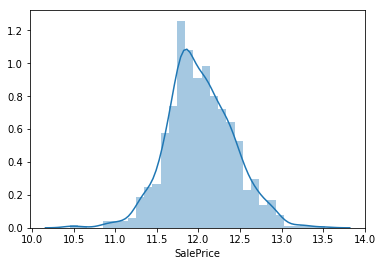

In [21]:
# will plot it again to see if there is some result 
sns.distplot(y_train)

In [22]:
# after transforming our "label" set we will continue with our feature "massage, some of ideas are get from here **https://www.biomedware.com/files/documentation/boundaryseer/Preparing_data/Methods_for_data_standardization.htm**



In [23]:
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.000000,4388,Pave,Unaccessible,IR1,Bnk,Inside,Gtl,...,45,45,0,45,N,6,2007,WD,Normal,1512
878,60,RL,74.000000,8834,Pave,Unaccessible,Reg,Lvl,Inside,Gtl,...,60,60,3,60,Y,6,2009,WD,Normal,3686
880,20,RL,70.177438,7000,Pave,Unaccessible,IR1,Lvl,CulDSac,Gtl,...,20,20,1,20,Y,7,2009,WD,Normal,1728
163,20,RL,95.000000,12182,Pave,Unaccessible,Reg,Lvl,Corner,Gtl,...,20,20,2,20,Y,5,2010,New,Partial,3082
1181,60,RL,70.177438,11170,Pave,Unaccessible,IR2,Lvl,Corner,Gtl,...,60,60,2,60,Y,4,2006,WD,Normal,3730
853,75,RL,53.000000,7128,Pave,Unaccessible,Reg,Lvl,Inside,Gtl,...,75,75,1,75,Y,8,2007,WD,Normal,2564
77,20,RL,70.177438,8475,Pave,Unaccessible,IR1,Lvl,Inside,Gtl,...,20,20,1,20,Y,4,2008,WD,Normal,1904
603,60,RL,80.000000,10041,Pave,Unaccessible,IR1,Lvl,Inside,Gtl,...,60,60,2,60,Y,2,2006,WD,Abnorml,2823
728,20,RL,64.000000,7314,Pave,Unaccessible,Reg,Lvl,Inside,Gtl,...,20,20,2,20,Y,2,2009,WD,Normal,2464


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [26]:
print((x_train.values == 'Abnorml').sum())

col_idx = pd.np.argmax(x_train.values == 'Abnorml', axis=1).max()

x_train.iloc[:, col_idx].value_counts()

76


Normal     825
Partial     96
Abnorml     76
Family      16
Alloca       7
AdjLand      2
Name: SaleCondition, dtype: int64

In [27]:
x_train.describe().size

x_train.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
HeatingQC         object
CentralAir        object
Electrical        object
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr      object
KitchenQual       object


In [28]:
# will label Encode categorical data, and will standardizing numeric data

# IF HAVE NO SUCECSS TRY TO  RETURN QUALITY AND CONDITION TO NUMERIC + MAKE CONDITION STRINGS TO NUMBBERS

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
# clf = RandomForestClassifier().fit(x_train.describe(), y_train[:x_train.describe().size - 1])

In [38]:
from sklearn.linear_model import LogisticRegression

#regression = LogisticRegression().fit(x_train, y_train)

numeric = x_train.describe().columns
# regression = LogisticRegression().fit(x_train[numeric], y_train)



from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [40]:
model.fit(x_train[numeric], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model.score(x_train[numeric], y_train)

0.8292473186025295

In [45]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in x_train['Condition1']] + [x for x in x_train['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(x_train.index), len(conditions))),
                       index=x_train.index, columns=conditions)
for i, cond in enumerate(zip(x_train['Condition1'], x_train['Condition2'])):
    x_train.ix[i, cond] = 1
x_train = pd.concat([x_train, dummies.add_prefix('Condition_')], axis=1)
x_train.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in x_train['Exterior1st']] + [x for x in x_train['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(x_train.index), len(exteriors))),
                       index=x_train.index, columns=exteriors)
for i, ext in enumerate(zip(x_train['Exterior1st'], x_train['Exterior2nd'])):
    dummies.ix[i, ext] = 1
x_train = pd.concat([x_train, dummies.add_prefix('Exterior_')], axis=1)
x_train.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in x_train.dtypes[x_train.dtypes == 'object'].index:
    for_dummy = x_train.pop(col)
    x_train = pd.concat([x_train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

KeyError: "['Feedr' 'Norm'] not in index"

In [49]:
categorical_columns = x_train.dtypes[x_train.dtypes == 'object'].index

In [50]:
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder
encoders = {col: LabelEncoder().fit(x_train[col]) for col in categorical_columns}


def encode_categorical(data, columns, encoders):
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)


train_encoded = encode_categorical(x_train, categorical_columns, encoders)

In [55]:
one_hot_encoder = OneHotEncoder().fit(train_encoded)

In [56]:
one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns,
                                                               encoders))

In [60]:
cat_regression = LinearRegression().fit(one_hot_x_train, y_train)

print(cat_regression.score(one_hot_x_train, y_train))

# one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
# print(cat_regression.score(one_hot_x_test, y_test))

0.874398743368866
